# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muli
Processing Record 2 of Set 1 | watertown
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | nadym
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | ejura
Processing Record 12 of Set 1 | labytnangi
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | fort bragg
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | yeniseysk
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | santa elena de uairen
Processing Record 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muli,2.9167,73.5667,27.83,75,88,2.89,MV,1710534826
1,watertown,42.3709,-71.1828,7.22,81,100,6.69,US,1710534583
2,adamstown,-25.0660,-130.1015,25.90,84,100,6.18,PN,1710534827
3,ushuaia,-54.8000,-68.3000,6.79,70,40,9.77,AR,1710534536
4,nadym,65.5333,72.5167,-4.55,96,100,6.73,RU,1710534828


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muli,2.9167,73.5667,27.83,75,88,2.89,MV,1710534826
1,watertown,42.3709,-71.1828,7.22,81,100,6.69,US,1710534583
2,adamstown,-25.0660,-130.1015,25.90,84,100,6.18,PN,1710534827
3,ushuaia,-54.8000,-68.3000,6.79,70,40,9.77,AR,1710534536
4,nadym,65.5333,72.5167,-4.55,96,100,6.73,RU,1710534828


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

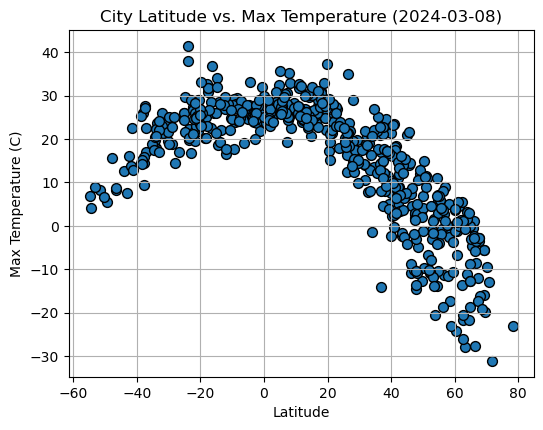

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(6, 4.5), title="City Latitude vs. Max Temperature (2024-03-08)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

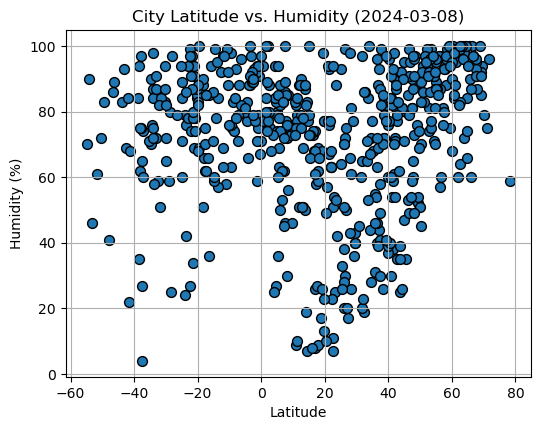

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(6, 4.5), title="City Latitude vs. Humidity (2024-03-08)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

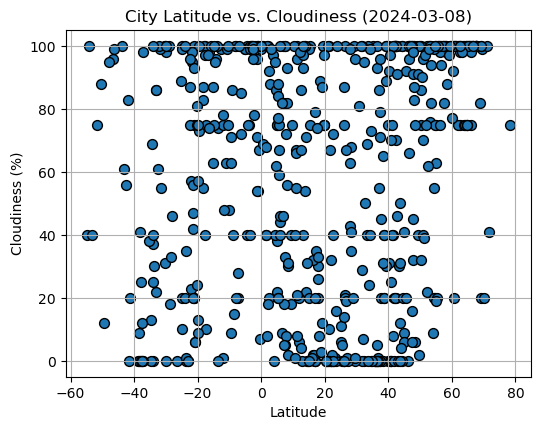

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(6, 4.5), title="City Latitude vs. Cloudiness (2024-03-08)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

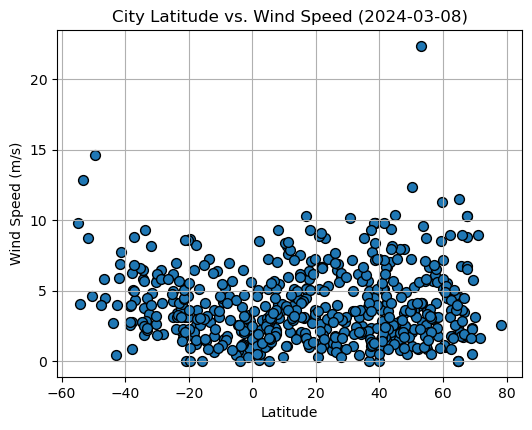

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(6, 4.5), title="City Latitude vs. Wind Speed (2024-03-08)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
 
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    # Create plot
    plt.figure(figsize=(6, 4.5))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.legend()

    # Annotate the line equation
    plt.annotate(line_eq, (0.5, 0.9), fontsize=12, color="red", xycoords="axes fraction")

    return rvalue**2  

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filt_NH=city_data_df.loc[city_data_df['Lat']>=0]
northern_hemi_df=pd.DataFrame(filt_NH)
# print(northern_hemi_df["Lat"])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muli,2.9167,73.5667,27.83,75,88,2.89,MV,1710534826
1,watertown,42.3709,-71.1828,7.22,81,100,6.69,US,1710534583
4,nadym,65.5333,72.5167,-4.55,96,100,6.73,RU,1710534828
7,jamestown,42.0970,-79.2353,6.77,92,100,3.60,US,1710534324
9,anadyr,64.7500,177.4833,-18.72,84,75,0.00,RU,1710534539


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filt_SH=city_data_df.loc[city_data_df['Lat']<0]
southern_hemi_df=pd.DataFrame(filt_SH)
# print(southern_hemi_df["Lat"])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,25.90,84,100,6.18,PN,1710534827
3,ushuaia,-54.8000,-68.3000,6.79,70,40,9.77,AR,1710534536
5,grytviken,-54.2811,-36.5092,4.14,90,100,4.04,GS,1710534536
6,avarua,-21.2078,-159.7750,28.03,69,20,2.06,CK,1710534252
8,edinburgh of the seven seas,-37.0676,-12.3116,16.91,74,98,4.35,SH,1710534376


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7569370352471979


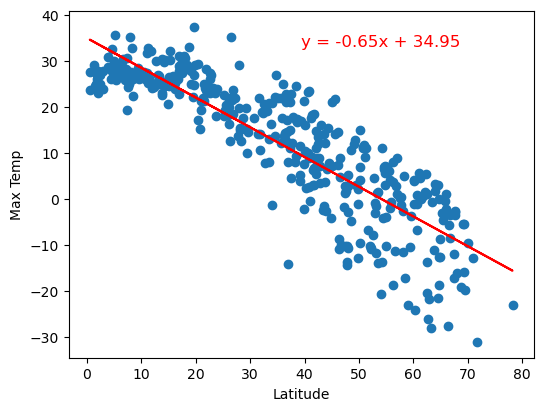

In [18]:
# Linear regression on Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temp')
print("The r-value is:", rvalue)
plt.show()

The r-value is: 0.3947793492780699


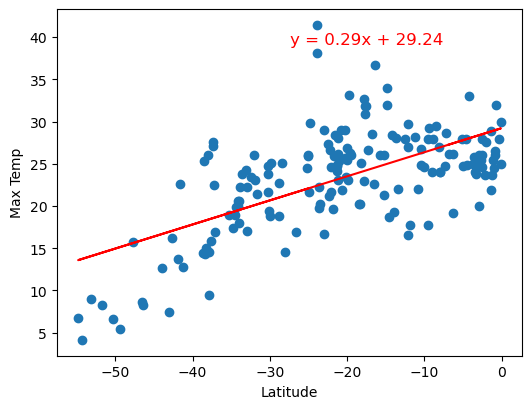

In [19]:
# Linear regression on Southern Hemisphere

rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temp')
print("The r-value is:",rvalue)
plt.show()

**Discussion about the linear relationship:** 
The R value of close to 0.8 shows a strong correlation between latitude and max temperaturebetween latitude and max temperature is very close to -1 indicates a strong negative correlation in the Northern Hemisphere. This means as latitude increases, the temperature decreases in a similar degree. The sample data from southern hemisphere showed a weaker correlation between latitude and max temprature. The R value is positive because latitude in southern hemisphere is negative.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10649426551275701


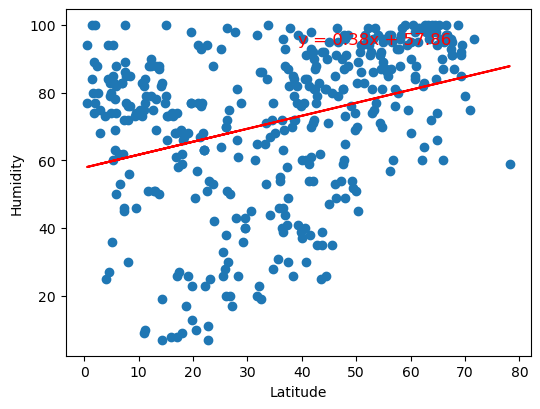

In [20]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity')
print("The r-value is:", rvalue)
plt.show()

The r-value is: 0.07047011266883123


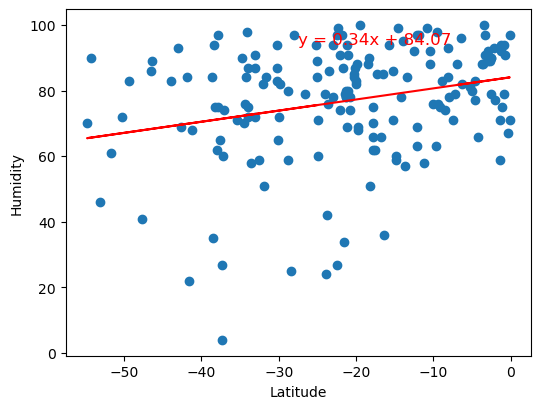

In [21]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** There is some correlation between latitude and humidity for both northern and southern hemisphere. This indicates that other geographical or climatic factors also play an important role in humidity value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11359939880245339


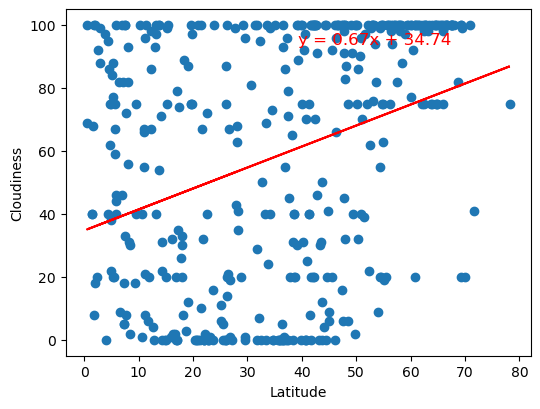

In [22]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness')
print("The r-value is:", rvalue)
plt.show()

The r-value is: 0.08812251296429155


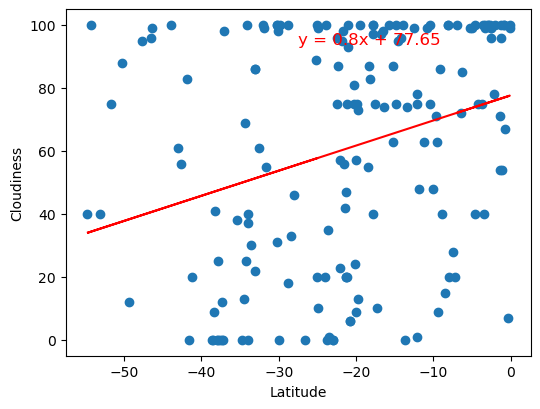

In [23]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** The R values derived from the sample data shows a very weak correlation between latitude and cloudiness for northern hemisphere and a weak to moderate one for the southern hemisphere. Although the R values for both hemispheres are positive, they still indicate that latitude is not the main factor to determine cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004803790786648547


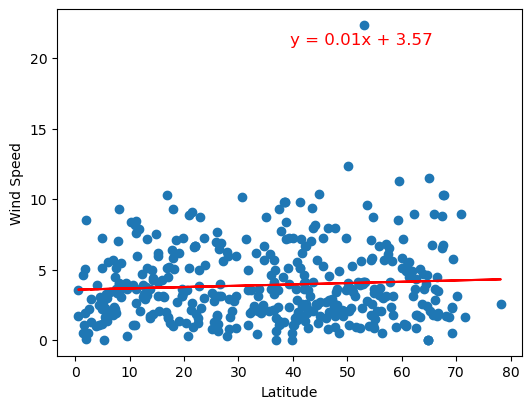

In [24]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed')
print("The r-value is:", rvalue)
plt.show()

The r-value is: 0.189262085065266


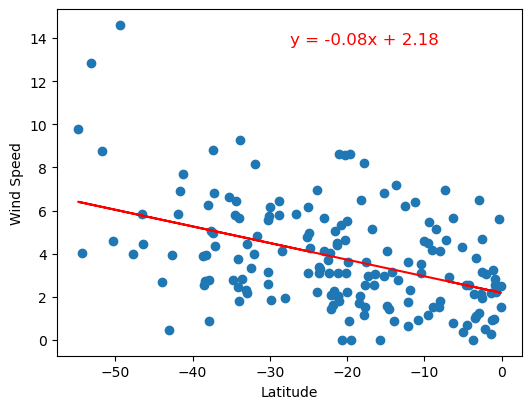

In [25]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** Similar to the last set of analysis, the R values of the sample data indicate weak (northern) to moderate (southern) correlation between latitude and wind speed for both hemispheres. The negative values mean the higher the latitudes, the lower the wind speed. There are other factors that play much more important roles in determining wind speed.